In [42]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END, MessagesState
from langchain.messages import SystemMessage, HumanMessage, AIMessage

In [43]:
class MyState(MessagesState):
    pass

In [44]:
def human_node(state:MyState):
    return {"messages": [HumanMessage("How are you?")]}

def system_node(state:MyState):
    return {"messages": [SystemMessage("You are a receptioninst at Hotel Mariott")]}

def ai_node(state:MyState):
    return {"messages": [AIMessage("Welcome to Mariott, I am doing great")]}

In [45]:
message_graph = StateGraph(MyState)

message_graph.add_node("Human", human_node)
message_graph.add_node("System", system_node)
message_graph.add_node("AI", ai_node)

message_graph.add_edge(START, "Human")
message_graph.add_edge("Human", END)
message_graph.add_edge(START, "System")
message_graph.add_edge("System", END)
message_graph.add_edge(START, "AI")
message_graph.add_edge("AI", END)

graph = message_graph.compile()


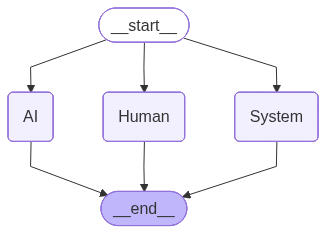

In [46]:
from utils import draw_graph
draw_graph(graph)

In [47]:
response = graph.invoke({"messages": []})
response

{'messages': [AIMessage(content='Welcome to Mariott, I am doing great', additional_kwargs={}, response_metadata={}, id='a7f7f09a-08f4-4566-82cd-2c32db6e0a23'),
  HumanMessage(content='How are you?', additional_kwargs={}, response_metadata={}, id='5a40357a-df83-4aa4-83c3-b6eb9e8437ba'),
  SystemMessage(content='You are a receptioninst at Hotel Mariott', additional_kwargs={}, response_metadata={}, id='739cdfc6-1f17-4be1-9def-40565f651837')]}

#### Rewrite given email in Formal, Friendly, and Consise Tone

In [48]:
class EmailState(MessagesState):
    Draft_Email: str

In [49]:
from utils import get_llm
llm = get_llm()

In [50]:
llm.invoke("What is the capital of France?")

AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 8, 'total_token_count': 15, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 8}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0032640420831739902, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--03759502-a1d4-4586-b7b2-8130a953a483-0', usage_metadata={'input_tokens': 7, 'output_tokens': 8, 'total_tokens': 15, 'input_token_details': {'cache_read': 0}})

In [51]:
from langchain_core.prompts import ChatPromptTemplate

In [52]:
def professional_email(state: EmailState) -> EmailState:
    Draft_Email = state['Draft_Email']
    
    prompt = ChatPromptTemplate([
        ('system', 'You are an expert in writing emails'),
        ('user', 'Consider the following draft email {Draft_Email}. Preserve the meaning and do not change the facts.'),
        ('user', 'Rewrite the email in less than 200 words in a professional tone')
    ])
    chain = prompt | llm
    return {"messages": chain.invoke({'Draft_Email': Draft_Email})}

def informal_email(state: EmailState) -> EmailState:
    Draft_Email = state['Draft_Email']
    
    prompt = ChatPromptTemplate([
        ('system', 'You are an expert in writing emails'),
        ('user', 'Consider the following draft email {Draft_Email}. Preserve the meaning and do not change the facts.'),
        ('user', 'Rewrite the email in less than 200 words in a casual friendly tone')
    ])    
    chain = prompt | llm
    return {"messages": chain.invoke({'Draft_Email': Draft_Email})}

In [53]:
email_graph = StateGraph(EmailState)

email_graph.add_node("Professional", professional_email)
email_graph.add_node("Casual", informal_email)

email_graph.add_edge(START, "Professional")
email_graph.add_edge("Professional", END)

email_graph.add_edge(START, "Casual")
email_graph.add_edge("Casual", END)

graph = email_graph.compile()

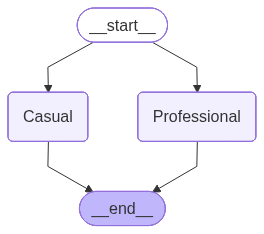

In [54]:
from utils import draw_graph
draw_graph(graph)

In [58]:
response = graph.invoke({
    "Draft_Email": "I want to go for a road trip for which I might need 5 days of leave. Please grant me leave",
    "messages": []
    })

In [59]:
response

{'messages': [AIMessage(content="Subject: Road Trip Leave Request!\n\nHi [Manager's name],\n\nHope you're having a great week!\n\nI'm planning a fun road trip and would love to request 5 days of leave, from [Start date] to [End date].\n\nThis trip has been on my mind for a while, and I'm really looking forward to it. I'll make sure all my urgent tasks are completed and hand over any ongoing projects before I go. I'll also be sure to set up an out-of-office reply and will have limited access to email during this time.\n\nPlease let me know if these dates work. I'd really appreciate it if you could approve my leave request.\n\nThanks a bunch!\n\nBest,\n\n[Your name]", additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 62, 'candidates_token_count': 162, 'total_token_count': 224, 'prompt_tokens_details': [{'modality': 1, 'token_count': 62}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 162}], 'thought

In [60]:
for message in response['messages']:
    message.pretty_print()

================================== Ai Message ==================================

Subject: Road Trip Leave Request!

Hi [Manager's name],

Hope you're having a great week!

I'm planning a fun road trip and would love to request 5 days of leave, from [Start date] to [End date].

This trip has been on my mind for a while, and I'm really looking forward to it. I'll make sure all my urgent tasks are completed and hand over any ongoing projects before I go. I'll also be sure to set up an out-of-office reply and will have limited access to email during this time.

Please let me know if these dates work. I'd really appreciate it if you could approve my leave request.

Thanks a bunch!

Best,

[Your name]
================================== Ai Message ==================================

Subject: Leave Request - [Your Name] - [Dates of Leave]

Dear [Manager's Name],

I am writing to request a leave of absence for five days, from [Start Date] to [End Date].

I am planning a road trip during this p